In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inspections_reviews_merge1 = pd.read_csv('inspections_reviews_merge1.csv')
restaurant_attributes = pd.read_csv('restaurant_attributes.csv')

In [8]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)

In [9]:
inspections_reviews_merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Columns: 257 entries, Unnamed: 0 to Inspection Date
dtypes: float64(171), int64(82), object(4)
memory usage: 11.6+ MB


In [6]:
restaurant_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5891 non-null   int64  
 1   Restaurant Name      5891 non-null   object 
 2   Zip Code             5891 non-null   int64  
 3   Inspection Date      5891 non-null   object 
 4   Facility ID          5891 non-null   float64
 5   Process Description  5891 non-null   object 
 6   letter_grade         5891 non-null   object 
 7   addr_line_1          5891 non-null   object 
 8   business_id          5891 non-null   object 
 9   latitude             5891 non-null   object 
 10  longitude            5891 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 506.4+ KB


In [14]:
inspections_reviews_merge1.head(1)

,Unnamed: 0,reviews_count,useful_sum,funny_sum,cool_sum,stars_1.0_sum,stars_2.0_sum,stars_3.0_sum,stars_4.0_sum,stars_5.0_sum,stars_nan_sum,stars,review_count,is_open,Score,Active Life,American (New),American (Traditional),Arts & Entertainment,Asian Fusion,Bagels,Bakeries,Barbeque,Bars,Beauty & Spas,Beer,Beer Bar,Breakfast & Brunch,Breweries,Bubble Tea,Buffets,Burgers,Cafes,Cajun/Creole,Caterers,Chicken Shop,Chicken Wings,Chinese,Cocktail Bars,Coffee & Tea,Comfort Food,Convenience Stores,Cooking Schools,Cosmetics & Beauty Supply,Delis,Desserts,Dim Sum,Diners,Dive Bars,Do-It-Yourself Food,Education,Event Planning & Services,Fast Food,Florists,Flowers & Gifts,Food,Food Court,Food Delivery Services,Food Stands,Food Trucks,French,Fruits & Veggies,Gastropubs,Gluten-Free,Greek,Grocery,Halal,Health Markets,Home Services,Hot Dogs,Hotels,Hotels & Travel,Ice Cream & Frozen Yogurt,Indian,Italian,Japanese,Juice Bars & Smoothies,Korean,Latin American,Local Flavor,Local Services,Lounges,Meat Shops,Mediterranean,Mexican,Middle Eastern,Music Venues,Nightlife,Party & Event Planning,Pizza,Pubs,Restaurants,Salad,Sandwiches,Seafood,Shopping,Shopping Centers,Soul Food,Soup,Southern,Specialty Food,Specialty Schools,Sports Bars,Steakhouses,Sushi Bars,Tacos,Tapas/Small Plates,Tex-Mex,Thai,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Wine & Spirits,HasTV,ByAppointmentOnly,RestaurantsTableService,DogsAllowed,HappyHour,DriveThru,WheelchairAccessible,RestaurantsDelivery,RestaurantsTakeOut,Caters,RestaurantsReservations,CoatCheck,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,Corkage,GoodForKids,BYOBCorkage,BusinessAcceptsBitcoin,RestaurantsPriceRange2,RestaurantsGoodForGroups,GoodForDancing,BYOB,Open24Hours,DietaryRestrictions,RestaurantsCounterService,AcceptsInsurance,Zip Code_78617,Zip Code_78620,Zip Code_78653,Zip Code_78660,Zip Code_78701,Zip Code_78702,Zip Code_78703,Zip Code_78704,Zip Code_78705,Zip Code_78719,Zip Code_78721,Zip Code_78722,Zip Code_78723,Zip Code_78724,Zip Code_78726,Zip Code_78727,Zip Code_78728,Zip Code_78729,Zip Code_78730,Zip Code_78731,Zip Code_78732,Zip Code_78733,Zip Code_78734,Zip Code_78735,Zip Code_78736,Zip Code_78738,Zip Code_78741,Zip Code_78744,Zip Code_78745,Zip Code_78746,Zip Code_78748,Zip Code_78749,Zip Code_78750,Zip Code_78751,Zip Code_78752,Zip Code_78753,Zip Code_78754,Zip Code_78756,Zip Code_78757,Zip Code_78758,Zip Code_78759,Zip Code_nan,Alcohol_0,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_u'beer_and_wine',Alcohol_u'full_bar',Alcohol_u'none',Alcohol_nan,WiFi_0,WiFi_'free',WiFi_'no',WiFi_'paid',WiFi_u'free',WiFi_u'no',WiFi_nan,RestaurantsAttire_0,RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_u'casual',RestaurantsAttire_u'dressy',RestaurantsAttire_nan,NoiseLevel_0,NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'quiet',NoiseLevel_'very_loud',NoiseLevel_u'average',NoiseLevel_u'loud',NoiseLevel_u'quiet',NoiseLevel_u'very_loud',NoiseLevel_nan,Smoking_0,Smoking_'no',Smoking_u'no',Smoking_u'outdoor',Smoking_u'yes',Smoking_nan,garage,lot,street,valet,validated,breakfast,brunch,dessert,dinner,latenight,lunch,casual,classy,divey,hipster,intimate,romantic,touristy,trendy,upscale,background_music,dj,jukebox,karaoke,live,no_music,video,friday,monday,saturday,sunday,thursday,tuesday,wednesday,letter_grade,pass_fail_flag,Inspection Date
0,0,42.0,29.0,11.0,16.0,1.0,5.0,9.0,15.0,12.0,0.0,4.0,699.0,1.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0.0,2,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
# checking which numeric columns have the most positive flags

inspections_reviews_merge1.sum()

Unnamed: 0                                                              17348995
reviews_count                                                            30846.0
useful_sum                                                               21801.0
funny_sum                                                                 8441.0
cool_sum                                                                 13317.0
stars_1.0_sum                                                             3932.0
stars_2.0_sum                                                             2548.0
stars_3.0_sum                                                             3180.0
stars_4.0_sum                                                             6155.0
stars_5.0_sum                                                            15031.0
stars_nan_sum                                                                0.0
stars                                                                    20875.0
review_count                

In [12]:
# checking summary stats

inspections_reviews_merge1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5891.0,2945.000000,1700.729549,0.0,1472.5,2945.0,4417.5,5890.0
reviews_count,5891.0,5.236123,9.857392,0.0,0.0,2.0,6.0,248.0
useful_sum,5891.0,3.700730,9.925644,0.0,0.0,1.0,4.0,236.0
funny_sum,5891.0,1.432864,5.113387,0.0,0.0,0.0,1.0,146.0
cool_sum,5891.0,2.260567,7.790868,0.0,0.0,0.0,2.0,203.0
stars_1.0_sum,5891.0,0.667459,1.392165,0.0,0.0,0.0,1.0,33.0
stars_2.0_sum,5891.0,0.432524,1.054695,0.0,0.0,0.0,1.0,24.0
stars_3.0_sum,5891.0,0.539806,1.244575,0.0,0.0,0.0,1.0,18.0
stars_4.0_sum,5891.0,1.044814,2.250982,0.0,0.0,0.0,1.0,45.0
stars_5.0_sum,5891.0,2.551519,6.098834,0.0,0.0,1.0,3.0,187.0


In [15]:
# remove columns w/ mean ==0 or ==1



In [31]:
#inspections_reviews_merge1.columns.tolist()

#'reviews_count',
#'review_count',

non_dummy = ['useful_sum','funny_sum','cool_sum','stars_1.0_sum','stars_2.0_sum','stars_3.0_sum','stars_4.0_sum','stars_5.0_sum','stars_nan_sum','stars','is_open','Score']

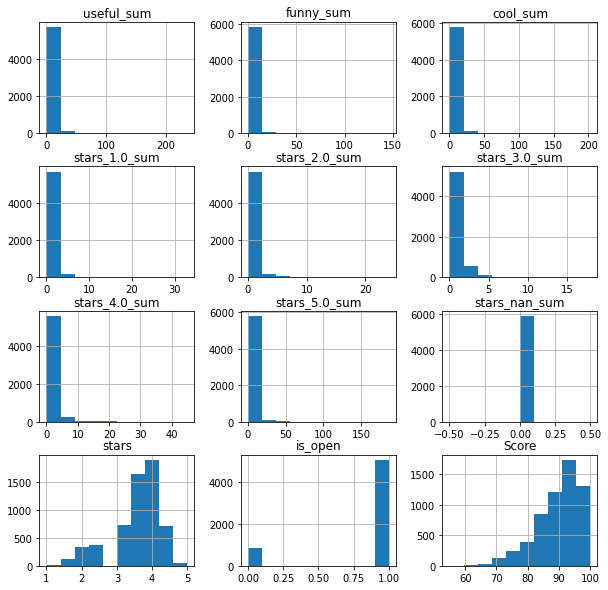

In [32]:
#histograms for each variable in df
hist = inspections_reviews_merge1[non_dummy].hist(bins=10,figsize =(10,10))

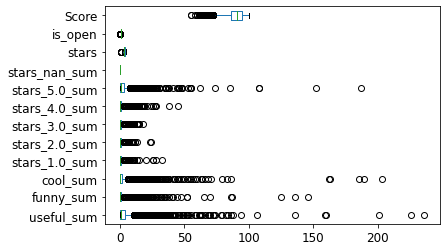

In [33]:
boxplot = inspections_reviews_merge1[non_dummy].boxplot(grid=False, vert=False,fontsize=12)

In [ ]:
# create time series, recency vars
# run random forest to get feature importance